# 4.10 IC Final Report / Analysis

## Contents:

01. Import libraries
02. Import datasets¶
03. Explore dataframe
04. Security implications
05. Create "region" column
06. Remove the low-activity customers
07. Customer profiling
08. Aggregate customer profiles for usage frequency and expenditure
09. Compare the customer profiles with regions and departments
10. Export final dataframe¶

## 01. Import libraries

In [2]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import datasets

In [4]:
# import datasets

path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Data Immersion/A4, Python Fundamentals for Data Analysts/Achievement 4/07-2024 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

## 03. Explore dataframe

In [ ]:
# check shape of dataset

df.shape

In [8]:
# remove restriction for maximum columns

pd.options.display.max_columns = None

In [10]:
# check first rows of dataset

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,beverages,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,dairy eggs,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,snacks,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,snacks,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,household,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [ ]:
# check statistics for the dataset

df.describe()

## 04. Security implications

## Addressing the PII in the dataframe

The customer data (their names and other personal details) is fabricated. For that reason the rulles for PII data do not apply to this dataset, and all the customer data can be kept in it.

## 05. Create "region" column

In [5]:
# define function for assigning states to regions

def region(row):
  
  ne = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
  mw = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
  s = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
  w = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
  
  if row['state'] in ne:
    return 'Northeast'
  elif row['state'] in mw:
    return 'Midwest'
  elif row['state'] in s:
    return 'South'
  elif row['state'] in w:
    return 'West'
  else: return 'other'

In [6]:
# create region column

df['region'] = df.apply(region, axis=1)

In [ ]:
# check count of values in the new column

df[['region', 'spending_flag']].value_counts()

In [10]:
# get the value counts for region and spending_flag (stacked)

df_grouped = df[['region', 'spending_flag']].value_counts().unstack()

In [11]:
# calculate the total for each region

df_grouped['total'] = df_grouped.sum(axis=1)

In [12]:
# sort the dataframe by the 'total' column in descending order

df_grouped = df_grouped.sort_values(by='total', ascending=False)

In [13]:
df_grouped

spending_flag,High spender,Low spender,total
region,,,
South,209691,10582194,10791885
West,160354,8132559,8292913
Midwest,155975,7441350,7597325
Northeast,108225,5614511,5722736


In [14]:
# drop the 'total' column as it's no longer needed for plotting

df_grouped = df_grouped.drop('total', axis=1)

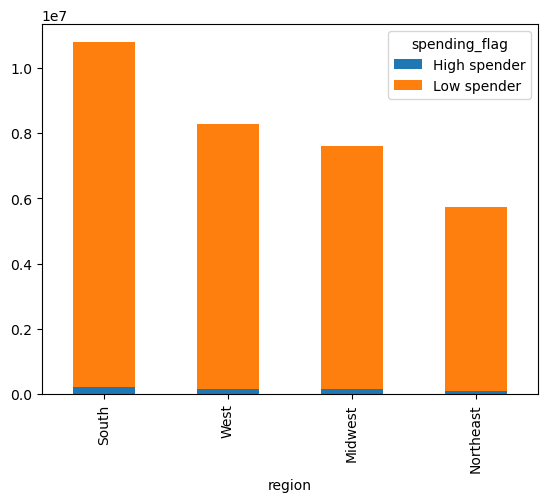

In [156]:
# create the stacked bar chart

bar_sf = df_grouped.plot.bar(stacked=True)

In [158]:
# export the grouped bar chart

bar_sf.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sf.png'))

## 06. Remove the low-activity customers

In [16]:
# create low-activity customers exclusion flag

df.loc[df['max_order'] <= 5, 'low-activity_cust'] = 'Yes' 
df.loc[df['max_order'] > 5, 'low-activity_cust'] = 'No'

In [19]:
# filter the dataframe where low-activity_cust is 'No'

df_hac_1 = df[df['low-activity_cust'] != 'Yes']

In [20]:
# filter the dataframe where low-activity_cust is 'Yes'

df_lac = df[df['low-activity_cust'] == 'Yes']

In [ ]:
# export the subset of low-activity customers

df_lac.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_lac.pkl'))

In [21]:
# drop rows with low-activity customers

df_hac = df.drop(df[df['low-activity_cust'] == 'Yes'].index, inplace=False)

In [ ]:
# export the subset of dataframe with droped low-activity customers

df_hac.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_hac.pkl'))

## 07. Customer profiling

In [ ]:
# get income statistics

df_hac['income'].describe()

In [24]:
# define conditions for single adult

conditions = [
    # Young single student 
    (df_hac['age'].between(18, 22)) & 
    (df_hac['dependants'] == 0) & 
    (df_hac['fam_status'].isin(['single', 'living with parents and siblings'])) & 
    (df_hac['department_id'] != 18), 
    # Young couple
    (df_hac['age'] < 35) & 
    (df_hac['dependants'] == 0) & 
    (df_hac['fam_status'] == 'married') & 
    (df_hac['department_id'] != 18), 
    # Single professional
    (df_hac['age'].between(22, 65)) & 
    (df_hac['dependants'] == 0) & 
    (df_hac['fam_status'].isin(['single', 'divorced/widowed'])) & 
    (df_hac['department_id'] != 18), 
    # Young family
    (df_hac['age'] < 35) & 
    (df_hac['dependants'] >= 1) & 
    (df_hac['fam_status'].isin(['single', 'married'])),
    # Single parent
    (df_hac['age'].between(35, 50)) & 
    (df_hac['dependants'] >= 1) & 
    (df_hac['fam_status'] == 'single'),
    # Established couple
    (df_hac['age'].between(35, 50)) & 
    (df_hac['dependants'] >= 1) & 
    (df_hac['fam_status'] == 'married'), 
    # Couple w/o kids
    (df_hac['age'].between(35, 50)) & 
    (df_hac['dependants'] == 0) & 
    (df_hac['fam_status'] == 'married') &
    (df_hac['department_id'] != 18), 
    # Empty nester
    (df_hac['age'].between(50, 65)) & 
    (df_hac['dependants'] == 0) & 
    (df_hac['fam_status'] == 'married') & 
    (df_hac['department_id'] != 18), 
    # Retired single
    (df_hac['age'] > 65) & 
    (df_hac['dependants'] == 0) & 
    (df_hac['fam_status'].isin(['single', 'divorced/widowed'])) & 
    (df_hac['department_id'] != 18), 
    # Senior couple
    (df_hac['age'] > 65) & 
    (df_hac['dependants'] == 0) & 
    (df_hac['fam_status'] == 'married') & 
    (df_hac['department_id'] != 18),
    # Seniors with dependants
    (df_hac['age'] > 50) & 
    (df_hac['dependants'] >= 1)
]

choices = ['Young single student', 'Young couple', 'Single professional', 'Young family', 'Single parent', 'Established couple', 'Couple w/o kids', 'Empty nester', 'Retired single', 'Senior couple', 'Seniors with dependants']

df_hac['cust_profile'] = np.select(conditions, choices, default='Other')

In [25]:
df_hac['cust_profile'].value_counts()

cust_profile
Seniors with dependants    10900955
Established couple          5709724
Single professional         5034209
Young family                4577451
Retired single              1834906
Other                       1545494
Young single student         568685
Name: count, dtype: int64

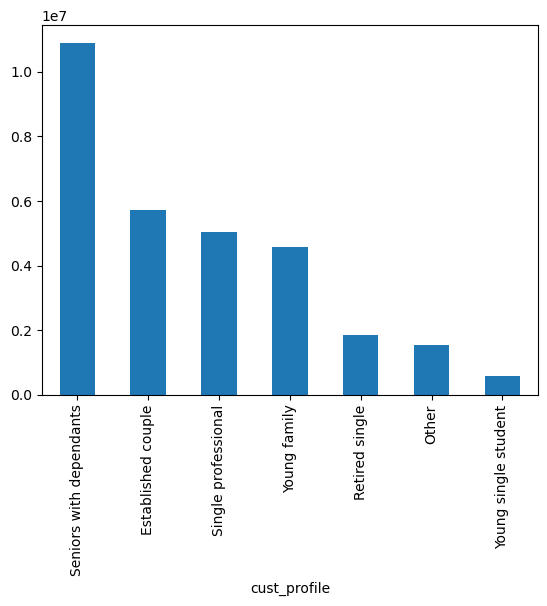

In [162]:
# visualise the customer profiles

bar_cp = df_hac['cust_profile'].value_counts().plot.bar()

In [152]:
# export the bar chart

bar_cp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cp.png'))

## 08. Aggregate customer profiles for usage frequency and expenditure

In [28]:
# group by customer profile and aggregate the frequency and spending columns for max, mean, and min

grouped = df_hac.groupby('cust_profile')
agg_results = grouped[['frequency', 'spending']].agg(['max', 'mean', 'min'])

In [29]:
agg_results

frequency                     spending             \
                              max      mean  min           max       mean   
cust_profile                                                                
Established couple           30.0  9.119420  0.0   3549.811989  11.495906   
Other                        30.0  9.018722  0.0  10209.987755  10.550872   
Retired single               30.0  9.142907  0.0  14042.512281  12.170497   
Seniors with dependants      30.0  9.180833  0.0   6389.512766  11.831071   
Single professional          30.0  9.119361  0.0  15006.940000  11.808851   
Young family                 30.0  9.168821  0.0   5271.136842  12.383788   
Young single student         30.0  9.234213  0.0   8794.882427  14.757023   

                                   
                              min  
cust_profile                       
Established couple       1.000000  
Other                    2.133333  
Retired single           1.900000  
Seniors with dependants  1.262500  
Single professional      1.100000  
Young family             1.773333  
Young single student     3.307971

## 09. Compare the customer profiles with regions and departments

In [30]:
# crosstab of customer profile by region

cust_profile_by_region = pd.crosstab(df_hac['cust_profile'], df_hac['region'])

In [31]:
cust_profile_by_region

region,Midwest,Northeast,South,West
cust_profile,,,,
Established couple,1353063,1008924,1895054,1452683
Other,366869,267623,527337,383665
Retired single,429478,343855,589316,472257
Seniors with dependants,2535270,1940663,3617222,2807800
Single professional,1191610,852940,1698088,1291571
Young family,1065128,807731,1528379,1176213
Young single student,128704,102615,194763,142603


In [32]:
# crosstab of customer profile by department

cust_profile_by_department = pd.crosstab(df_hac['cust_profile'], df_hac['department'])

In [33]:
cust_profile_by_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
cust_profile,,,,,,,,,,,,,,,,,,,,,
Established couple,25739,80049,205647,468961,123800,6366,185033,963699,184672,150330,387435,130476,47123,123292,11697,6036,328237,78526,16536,1679606,506464
Other,8069,120421,52381,116148,32355,1615,46946,244460,46963,38365,100057,32364,12046,31387,3221,1770,83622,19594,5198,420326,128186
Retired single,8286,0,66414,154924,38354,1897,58907,311732,60301,48957,129441,41101,15103,40589,3609,1955,106028,25699,6215,549402,165992
Seniors with dependants,48837,143446,395230,915571,235501,11916,356214,1809992,352455,289609,747612,248292,88945,239764,22694,11991,627358,149072,32776,3197009,976671
Single professional,24385,0,186904,425983,111401,5301,166777,856134,167811,133822,346094,112000,42523,108239,10550,5848,292435,69164,14754,1498151,455933
Young family,21459,59150,165133,377384,99856,5109,150240,771885,147296,121189,310499,101254,37896,100211,9527,5137,262037,61565,13066,1342826,414732
Young single student,2798,0,20779,48270,12152,637,17924,95538,18552,15411,38187,12808,5086,12247,1243,678,32397,8187,1794,172624,51373


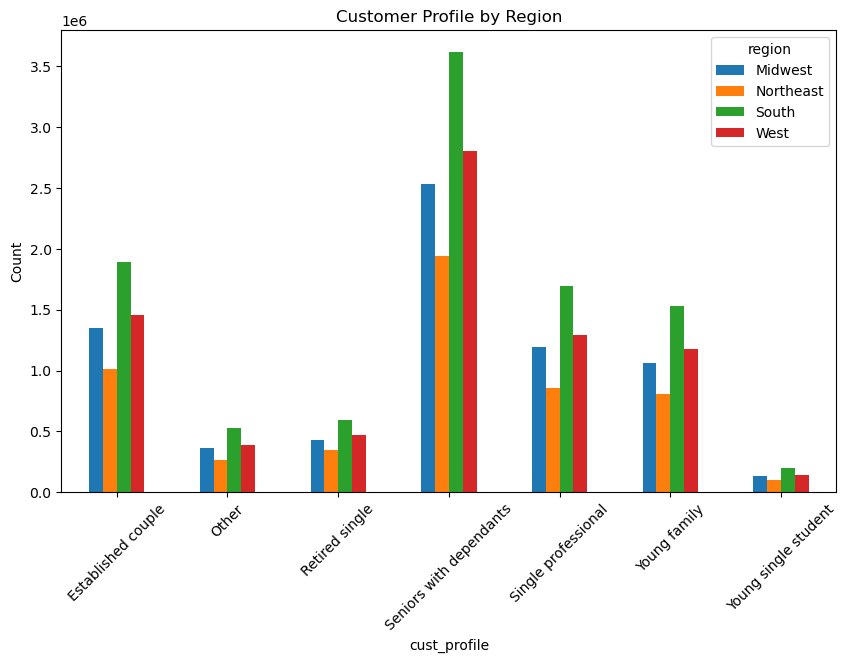

In [125]:
# grouped bar chart for customer profile by region

bar_cpr = cust_profile_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Customer Profile by Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [131]:
# export the grouped bar chart

bar_cpr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cpr.png'))

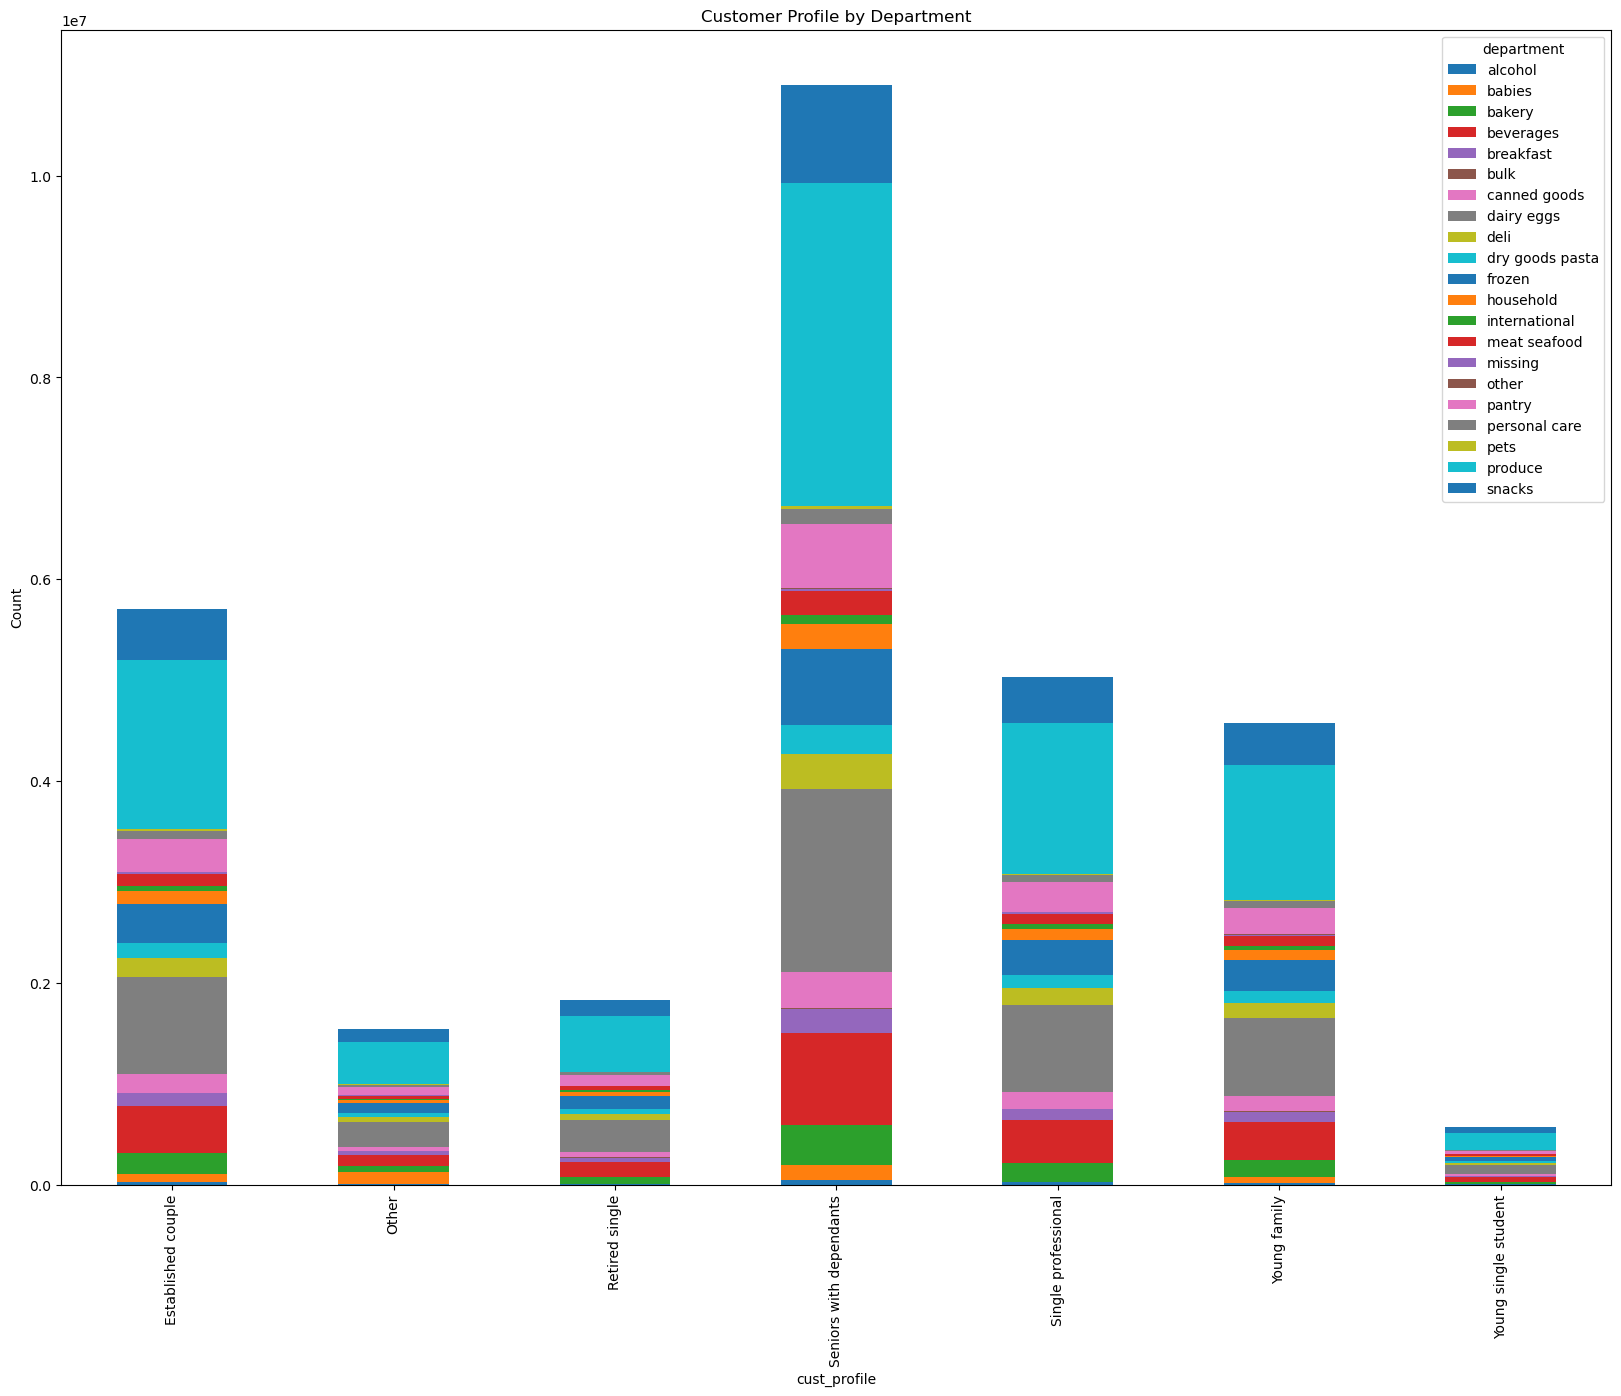

In [160]:
# stacked bar chart for customer profile by department

bar_cpd = cust_profile_by_department.plot(kind='bar', stacked=True, figsize=(20, 15))
plt.title('Customer Profile by Department')
plt.ylabel('Count')
plt.show()

In [154]:
# export the stacked bar chart

bar_cpd.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cpd.png'))

## 10. Export final dataframe

In [172]:
# export dataframe to pickle

df_hac.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_df.pkl'))